## Functional API

A limitation of sequential neural network you cannot create complex topologies

Not all neural networks are simply sequential as we saw in the previous lectures. Some may have complex topologies. Some may have multiple inputs and or multiple outputs. For example, a wide and deep neural network can connect all parts of the inputs
directly to the output layer, besides connecting the input layers to hidden ones.

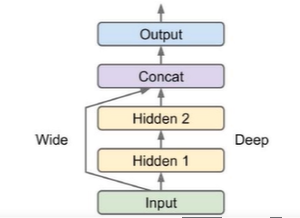

In [ ]:
#run codes from previous lecture to get datasets and import modulesr
%run "Lecture (Implementing Neural Network for Regression).ipynb"

In [3]:
#but del model and clear session to free memory
del model
keras.backend.clear_session()

In [5]:
#create neural network
input_ = keras.layers.Input(shape = X_train.shape[1:]) #input layer
hidden1 = keras.layers.Dense(30, activation = "relu")(input_) #call the input like a function to say that the input layer is the input for hidden1
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1) #call hidden1 to specify that it is the input for hidden2
concat = keras.layers.concatenate([input_, hidden2]) #concatenate the input and hidden layers as a list
output = keras.layers.Dense(1)(concat) #output layer
model = keras.models.Model(inputs = [input_], outputs = [output]) #specify input and ouput layers

In [6]:
#inspect neural network architecture
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [7]:
#compile the model, remember that we are using the datasets from regression NN
model.compile(loss = "mean_squared_error", #loss function
             optimizer = keras.optimizers.SGD(lr = 1e-3), #stochastic gradient descent learning rate
             metrics = ["mae"]) #mae = mean absolute error metrics

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#fit the model
model_history = model.fit(X_train, y_train, epochs = 40, validation_data = (X_valid, y_valid))

In [18]:
model_history.history #get values of loss and mae for train and validation sets for each epoch

{'loss': [0.3449723422527313,
  0.34496140480041504,
  0.3449508249759674,
  0.34494051337242126,
  0.3449305295944214,
  0.3449208736419678,
  0.34491145610809326,
  0.3449023365974426,
  0.3448934257030487,
  0.34488481283187866,
  0.3448764681816101,
  0.34486839175224304,
  0.3448604643344879,
  0.3448528051376343,
  0.3448452949523926,
  0.34483805298805237,
  0.3448309600353241,
  0.34482404589653015,
  0.34481731057167053,
  0.34481072425842285,
  0.3448043167591095,
  0.34479811787605286,
  0.34479209780693054,
  0.3447861671447754,
  0.34478044509887695,
  0.34477487206459045,
  0.3447694182395935,
  0.3447640836238861,
  0.34475889801979065,
  0.34475383162498474,
  0.34474891424179077,
  0.3447440564632416,
  0.3447393476963043,
  0.34473469853401184,
  0.3447301685810089,
  0.34472572803497314,
  0.3447214365005493,
  0.3447171747684479,
  0.344713032245636,
  0.34470894932746887],
 'mae': [0.41322454810142517,
  0.41324475407600403,
  0.41326460242271423,
  0.4132842421531

In [20]:
#evaluate model performance
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 806us/step - loss: 0.4278 - mae: 0.4450


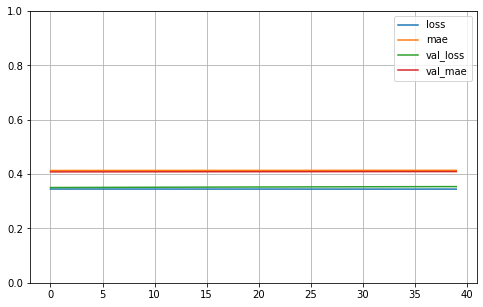

In [21]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Saving and Restoring

You can save the model after training include the model hyperparameters weight and biases for each layer. Instead of training the model each time you open jupyter notebook, you can just load the model you previously saved.

In [22]:
#save model in the working directory
model.save("my_Func_model.h5")

In [29]:
#delete current model in the memory
del model

In [25]:
keras.backend.clear_session()

In [26]:
model = keras.models.load_model("my_Func_model.h5")

In [27]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [28]:
y_pred = model.predict(X_new)
print(y_pred)

[[0.68963027]
 [1.6225455 ]
 [3.5856137 ]]


## Using callbacks during Training

For large datasets it can take hours just to train the model with neural networks

Callbacks are similar to checkpoints that allow saving the model after each epoch training



In [31]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [36]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(learning_rate = 1e-3))

In [37]:
#define callback points
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5") #the file name allows you to pass the model number inside {epoch:02d} (02 digits), creating a file for each callback instead of overwriting it

In [38]:
#fit the model with callbacks
history = model.fit(X_train, y_train, epochs = 10,
                   validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb]) #specify callbacks argument

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4474 - val_loss: 0.4379

In [39]:
del model
keras.backend.clear_session()

In [40]:
#you can load the file similar as the first time, but you can choose which model now because you saved the model for each epoch
model = keras.models.load_model("Model-05.h5")

In [41]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 920us/step - loss: 0.5059


## Best Model Only

Another option: you do not have to save each model epoch, but only the best one by passing the argument "save_best_only = True" in the callback checkpoint function

In [42]:
del model
keras.backend.clear_session()

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [44]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(learning_rate = 1e-3))

In [45]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only = True) #here is where you define only the best model to be saved

In [55]:
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.4581 - val_loss: 0.7883
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7368 - val_loss: 0.7306
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6516 - val_loss: 0.6501
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5951 - val_loss: 0.5551
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5536 - val_loss: 0.5025
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5199 - val_loss: 0.4728
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4940 - val_loss: 0.4497
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4730 - val_loss: 0.4359
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4563 - val_loss: 0.4267
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4431 - val_loss: 0.4224

In [56]:
model = keras.models.load_model("Best_Model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 821us/step - loss: 0.4366


## Early stopping method

If you run your model with a very large number of epochs, you keep an eye at the validation scores, if the scores are not decreasing, that is, improving, you can early stop and use the best model found so far.

In [57]:
del model
keras.backend.clear_session()

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])

In [59]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(learning_rate = 1e-3))

In [63]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only = True) #here is where you define only the best model to be saved

In [64]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,
                                                 restore_best_weights = True)

#patience argument specify the number of epochs with no improvement after which training will be stopped

In [65]:
history = model.fit(X_train, y_train, epochs = 200,
                   validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb, early_stopping_cb]) #you can specify more than one callbacks

#note that the model stops before running all epochs

Epoch 1/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3520 - val_loss: 0.3443
Epoch 2/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3513 - val_loss: 0.3659
Epoch 3/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3505 - val_loss: 0.3610
Epoch 4/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3496 - val_loss: 0.3472
Epoch 5/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3490 - val_loss: 0.3460
Epoch 6/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3480 - val_loss: 0.3629
Epoch 7/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3473 - val_loss: 0.3445
Epoch 8/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3466 - val_loss: 0.3368
Epoch 9/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3458 - val_loss: 0.3611
Epoch 10/200
363/363 [==============================] - 0s 1ms/step - loss: 0.3451 - val_lo

In [66]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 852us/step - loss: 0.3410
